## Reducing the Dimension of the Data 

In [46]:
#Importing packages  and libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
from IPython.display import Image

matplotlib.rcParams['figure.figsize'] = [6, 6]

#code source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

In [11]:
kick = pd.read_csv("C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick.csv")

In [12]:
# Retrieve features/attributes of dataset
X = kick.iloc[:, np.r_[2,4,5,8,9,10]]

# Retrieve target variable of dataset
y = kick.iloc[:,11]

In [13]:
target = y.to_numpy()
features = X.to_numpy()

### PCA Step 1: Mean Centering the Data 

In [14]:
#getting the mean of all the features 
features.mean(axis=0)

array([1.16381581e+02, 1.05490180e+04, 4.40379606e+04, 3.39548745e+01,
       1.89948263e+01, 7.48340996e+00])

In [16]:
features_centered = (features - features.mean(axis=0))

### PCA Step 2: Calculate the Covariance Matrix

In [19]:
cov_mat = np.cov(m=features_centered.T)
cov_mat

array([[ 9.32049809e+05,  7.45339732e+07,  5.91525623e+06,
        -6.06990212e-01,  6.61229002e+01,  2.14881827e+00],
       [ 7.45339732e+07,  1.05316792e+10,  7.67179849e+08,
         1.12875438e+04,  6.43602975e+03,  2.55376161e+03],
       [ 5.91525623e+06,  7.67179849e+08,  1.38406632e+12,
         3.23168027e+05, -3.07064936e+04,  4.09627595e+03],
       [-6.06990212e-01,  1.12875438e+04,  3.23168027e+05,
         1.61628821e+02,  2.38743334e+00,  1.92557510e+00],
       [ 6.61229002e+01,  6.43602975e+03, -3.07064936e+04,
         2.38743334e+00,  3.83634205e+01, -2.63669955e-01],
       [ 2.14881827e+00,  2.55376161e+03,  4.09627595e+03,
         1.92557510e+00, -2.63669955e-01,  1.54564285e+01]])

###  PCA Step 3. Decompose the covariance matrix

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print('EigenVectors:\n', eigenvectors)
print('\nEigenValues:', eigenvalues)

EigenVectors:
 [[ 4.30390359e-06 -7.07718925e-03  9.99974934e-01  1.98789946e-04
  -3.60445307e-05 -5.52184815e-05]
 [ 5.58544203e-04 -9.99974800e-01 -7.07719021e-03 -2.47641539e-06
   4.91167913e-07 -1.98353319e-07]
 [ 9.99999844e-01  5.58560675e-04 -3.50824406e-07 -2.32513697e-07
  -5.61027249e-10  2.70482991e-08]
 [ 2.33496167e-07 -1.05459364e-06 -1.99327475e-04  9.99726560e-01
   1.33424112e-02 -1.92027460e-02]
 [-2.21831020e-08 -6.12763286e-07  5.08832790e-05  1.93751869e-02
  -1.29166915e-02  9.99728843e-01]
 [ 2.96062435e-09 -2.42259608e-07 -3.93706454e-05  1.30907498e-02
  -9.99827554e-01 -1.31716694e-02]]

EigenValues: [1.38406675e+12 1.05317782e+10 4.04543409e+05 1.61597062e+02
 1.54261511e+01 3.83152767e+01]


The Principle Components are the columns of the Eigenvectors matrix 

In [25]:
#sorting the vectors because it doesn't do it automatically 
#viewing the eigenvalues 
eigenvalues

array([1.38406675e+12, 1.05317782e+10, 4.04543409e+05, 1.61597062e+02,
       1.54261511e+01, 3.83152767e+01])

In [27]:
np.argsort(eigenvalues)[::-1]

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [30]:
components_order = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[components_order]

sorted_eigenvectors = eigenvectors[:,components_order]

print('Sorted EigenVectors:\n', sorted_eigenvectors)
print('\nSorted EigenValues:', sorted_eigenvalues)

Sorted EigenVectors:
 [[ 4.30390359e-06 -7.07718925e-03  9.99974934e-01  1.98789946e-04
  -5.52184815e-05 -3.60445307e-05]
 [ 5.58544203e-04 -9.99974800e-01 -7.07719021e-03 -2.47641539e-06
  -1.98353319e-07  4.91167913e-07]
 [ 9.99999844e-01  5.58560675e-04 -3.50824406e-07 -2.32513697e-07
   2.70482991e-08 -5.61027249e-10]
 [ 2.33496167e-07 -1.05459364e-06 -1.99327475e-04  9.99726560e-01
  -1.92027460e-02  1.33424112e-02]
 [-2.21831020e-08 -6.12763286e-07  5.08832790e-05  1.93751869e-02
   9.99728843e-01 -1.29166915e-02]
 [ 2.96062435e-09 -2.42259608e-07 -3.93706454e-05  1.30907498e-02
  -1.31716694e-02 -9.99827554e-01]]

Sorted EigenValues: [1.38406675e+12 1.05317782e+10 4.04543409e+05 1.61597062e+02
 3.83152767e+01 1.54261511e+01]


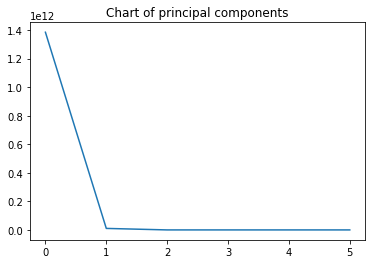

In [35]:
%matplotlib inline

sorted_eigenvalues

plt.plot(sorted_eigenvalues)
plt.title("Chart of principal components");

In [37]:
print("""
PCA 1: {0:.2f}% of variance explained
PCA 2:  {1:.2f}% of variance explained
PCA 3:  {2:.2f}% of variance explained
""".format(*tuple(sorted_eigenvalues / sorted_eigenvalues.sum() * 100)))


PCA 1: 99.24% of variance explained
PCA 2:  0.76% of variance explained
PCA 3:  0.00% of variance explained



In [39]:
kick_principal_components = features_centered @ sorted_eigenvectors[:,:2]

In [41]:
kick_principal_components[:10]

array([[-42416.47905332,  10525.88695872],
       [-12215.41666817,   7974.27494408],
       [  3696.77657069,  10318.23059934],
       [-38739.34659214,  10526.87293295],
       [  9032.18163514, -45010.21573803],
       [-42982.23242625,   9247.10506636],
       [-17521.08189378,  10058.93373177],
       [-41490.90760835,  10526.40398087],
       [-30775.0724936 ,  -2941.41298259],
       [-38739.34718903,  10527.94088534]])

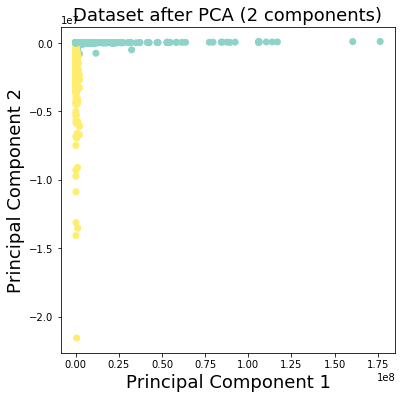

In [50]:
plt.scatter(kick_principal_components[:,0], kick_principal_components[:,1], c=target, 
            cmap=cm.Set3)
plt.title("Dataset after PCA (2 components)", size=18)
plt.xlabel("Principal Component 1", size=18)
plt.ylabel("Principal Component 2", size=18);



## Trying a different way - Scikit learn


In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
kick_pca = pca.fit_transform(features_centered)

In [54]:
pca.components_

array([[ 4.30390359e-06,  5.58544203e-04,  9.99999844e-01,
         2.33496167e-07, -2.21831020e-08,  2.96062435e-09],
       [ 7.07718925e-03,  9.99974800e-01, -5.58560675e-04,
         1.05459364e-06,  6.12763286e-07,  2.42259608e-07],
       [ 9.99974934e-01, -7.07719021e-03, -3.50824406e-07,
        -1.99327475e-04,  5.08832790e-05, -3.93706454e-05]])

In [56]:
pca.explained_variance_ratio_

array([9.92447877e-01, 7.55183296e-03, 2.90078675e-07])

In [58]:
eigenvectors[:,[0,3]].T

array([[ 4.30390359e-06,  5.58544203e-04,  9.99999844e-01,
         2.33496167e-07, -2.21831020e-08,  2.96062435e-09],
       [ 1.98789946e-04, -2.47641539e-06, -2.32513697e-07,
         9.99726560e-01,  1.93751869e-02,  1.30907498e-02]])

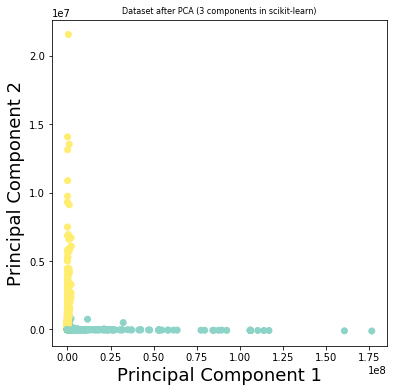

In [62]:
plt.scatter(kick_pca[:,0], kick_pca[:,1], c=target, 
            cmap=cm.Set3)
plt.title("Dataset after PCA (3 components in scikit-learn)", size=8)
plt.xlabel("Principal Component 1", size=18)
plt.ylabel("Principal Component 2", size=18);


In [69]:
#https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot/22867877#22867877 
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from IPython.display import display


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [70]:
mean_x = features_centered[:,0].mean()
mean_y = features_centered[:,1].mean()
mean_z = features_centered[:,2].mean()

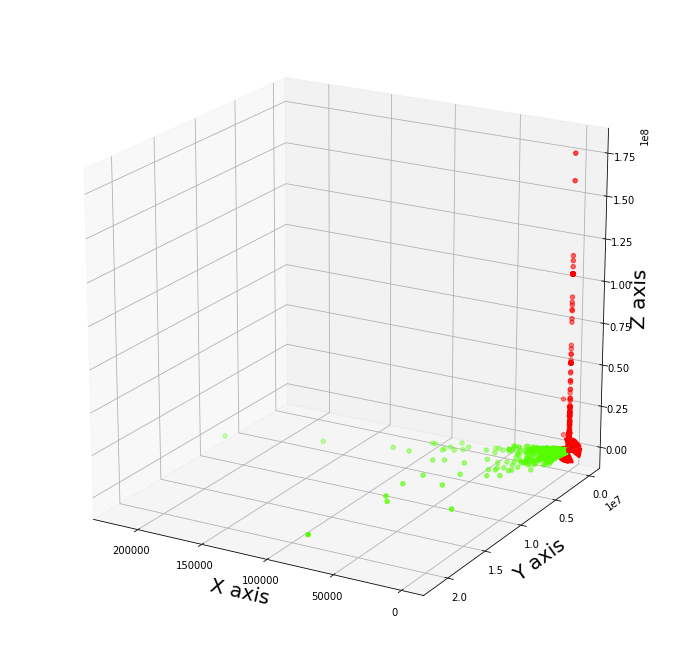

IntSlider(value=20, max=90)

In [71]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X axis", size=20)
ax.set_ylabel("Y axis", size=20)
ax.set_zlabel("Z axis", size=20)

ax.scatter(features_centered[:,0], features_centered[:,1], features_centered[:,2], c=target,
           cmap=cm.prism)

for v in eigenvectors:
    
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.view_init(20, 120)
plt.show()

def update_chart(angle1=20, angulo2=120):
    ax.view_init(angle1, angulo2)
    fig.canvas.draw_idle()

# widgets
angle1_slider = widgets.IntSlider(20, min = 0, max = 90)
display(angle1_slider)

def update_angle1(value):
    update_chart(angle1=value['new'])

angle1_slider.observe(update_angle1, names = 'value')